In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

In [2]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

**Movimiento Browniano Estandar**

In [3]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

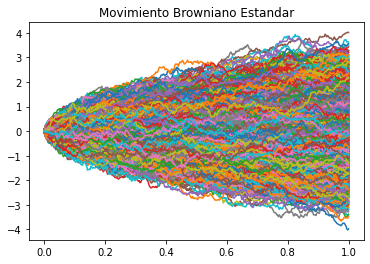

In [4]:
mb = MBEU(trayectorias,puntos)
for i in range(len(mb)):
  plt.plot(t, mb[i, :])
plt.title('Movimiento Browniano Estandar')
plt.show()

$\textbf{Movimiento Browniano Bridge}$

In [8]:
def BRIDGE(numTrayectorias,numPuntos):
  mb = MBEU(numTrayectorias,numPuntos)
  br = np.zeros((numTrayectorias, numPuntos+1))
  t = np.linspace(0,1,numPuntos+1)
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      br[i,j] = mb[i,j] - t[j]*mb[i,-1]
  return br

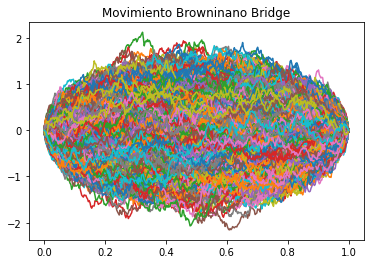

In [9]:
br = BRIDGE(trayectorias,puntos)
for i in range(len(br)):
  plt.plot(t, br[i, :])
plt.title('Movimiento Browninano Bridge')
plt.show()

1.   (a) La medida de centralidad (valor esperado) de dispersión (varianza) y de dispersión conjunta (covarianza). Para ello compare cada una de las propiedades estadísticas teóricas solicitadas con las empíricas.
2.   (b) Si son o no procesos Gaussianos.
3.   (c) Si son o no Movimientos Brownianos Estándar.

Media teorica = 0, Media simulada = -0.0022694338810305115
Varianza teorica = 0.1666654156502158 , Varianza simulada = 0.16646605509114773
Covarianza teorica = 0.1166072433852505 , Covarianza simulada = 0.1181530066173412


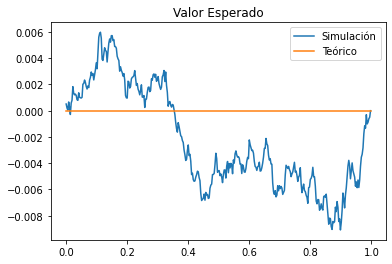

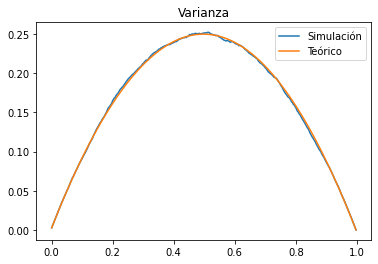

In [11]:
medias_br = []
varianzas_e_br = []
varianzas_t_br = []

for i in range(1, puntos+1):
  medias_br.append(np.mean(br[:, i]))
  varianzas_t_br.append((i*delta_t) - (i*delta_t)**2)
  varianzas_e_br.append(np.var(br[:, i]))

#Para garantizar s<t:
t_rand= random.randrange(puntos+1)
while t_rand==0:
  t_rand= random.randrange(puntos+1)
if t_rand==1:
    s_rand=0
else:
  s_rand= random.randrange(puntos+1)
  while s_rand >= t_rand:
    s_rand= random.randrange(puntos+1)

covarianza_br = np.cov(br[:,t_rand], br[:, s_rand])
covarianza_e_br = covarianza_br[0][1]
covarianza_t_br = np.minimum(s_rand*delta_t, t_rand*delta_t)-(s_rand*delta_t)*(t_rand*delta_t)

print('Media teorica = 0, Media simulada =', np.mean(medias_br))
print('Varianza teorica =', np.mean(varianzas_t_br),", Varianza simulada =",np.mean(varianzas_e_br))
print('Covarianza teorica =', covarianza_t_br,', Covarianza simulada =', covarianza_e_br)

aux = [0]*len(medias_br)
fig1 = plt.figure()
t_aux = list(np.arange(0,1, delta_t))
plt.plot(t_aux, medias_br, label="Simulación")
plt.plot(t_aux, aux,label='Teórico')
plt.title("Valor Esperado")
plt.legend()
plt.show()

fig2 = plt.figure()
plt.plot(t_aux, varianzas_e_br,label='Simulación')
plt.plot(t_aux, varianzas_t_br,label='Teórico')
plt.legend()
plt.title("Varianza")
plt.show()

>Como podemos evidenciar el valor esperado, la varianza y la covarianza se ajustan de manera adecuada a las teóricas.

¿Es un proceso Gaussiano?

In [13]:
normalidad=0
otra=0
for i in range(puntos+1):
  stat, prob= st.jarque_bera(br[:,i])
  if prob>0.05:
    normalidad+=1
print('Porcentaje de instantes de tiempo normales',normalidad*100/puntos,"%")

Porcentaje de instantes de tiempo normales 97.53424657534246 %


>En este caso podemos concluir que si es un proceso Gaussiano, pues más del 97.53% de los instantes de tiempo son normales.

¿Es un Movimiento Browniano Estandar?

In [14]:
t_aux1 = random.randrange(1,puntos+1)
Wt = br[:, t_aux1]
print('Varianza experimental:', np.var(Wt), ', Varianza teorica', t_aux1*delta_t)

Varianza experimental: 0.2271744985174324 , Varianza teorica 0.6465753424657534


>**Var(Bt)** es claramente diferente de **t**, por lo tanto el Movimiento Browniano Bridge no es un MBE.